# Benchmark Classical vs Quantum Spatial Discrtetization
This notebook presents comparative performance graph showing the quadratic improvement of the quantum algorithm over the classical approach in the task of Spatial discretization. The x-axis represents the input size, while the y-axis indicates the number of Oracle applications required. The quantum algorithm's curve illustrates a markedly lower growth rate, confirming its superior efficiency.

In classical computation, our goal is to select $M$ points within a designated feasible area, where the likelihood of a point being inside this area is denoted by $p$. The anticipated number of Oracle function calls averages to $\frac{M}{p}$.

Let us define $X_i$ as a Bernoulli random variable with outcomes in $\{0,1\}$ and associated probabilities $\{1-p, p\}$. The distribution that characterizes the requisite number of attempts $N$ to attain $M$ successful selections can be described as follows. The probability that exactly $N$ attempts are needed is given by:

$$
    P(Y=N) = \binom{N-1}{M-1}p^{M}(1-p)^{N-M} (1),
$$
referred to as the probability distribution of variable $Y$.

The expected number of attempts, denoted as $E[Y]$, is calculated by:

$$ E[Y] = \sum_{N = M}^\infty N P(Y = N) \nonumber
    = \sum_{N = M}^\infty N \binom{N-1}{M-1}p^{M}(1-p)^{N-M} \nonumber
    = \frac{Mp}{(1-p)^{M+1}}\sum_{N = M}^\infty \binom{N}{M}(1-p)^{N}, (2)$$

employing the binomial theorem in deriving the expected value (Equation 2).

$$
    \sum_{N=M}^\infty \binom{N}{M}(1-p)^{N} = \frac{(1-p)^M}{p^{M+1}}.
$$

By integrating (1) with (2), we deduce:

$$
    E[Y] = \frac{M}{p}. (3)
$$
This figure represents the typical number of queries in classical cases (Equation (3)).


In the quantum paradigm, as detailed in Equation (4), the goal is similar: to sample $M$ points within the feasible zone at probability $p$. Let $CI(x)$ be the function returning the nearest integer to a real number $x$, and let $\phi := \arcsin(\sqrt{2p(1-p)})$. Following the principles of Grover's algorithm , executing the oracle $R$ times, where $R := CI\left(\frac{\arccos(\sqrt{p})}{\phi}\right)$, significantly increases the probability of finding a point in the desired zone to nearly $1$. Consequently, the oracle $f$ needs to be applied $(R+1)*M$ times, with $R \leq \sqrt{\frac{1}{p}}$. This results in:

$$
    (R+1)M \thickapprox \frac{M}{\sqrt{p}} < \frac{M}{p}, (4)
$$
indicating a quadratic enhancement compared to the $\frac{M}{p}$ operations necessary in the classical approach.


In [1]:
import numpy as np
import bisect
import matplotlib.pyplot as plt

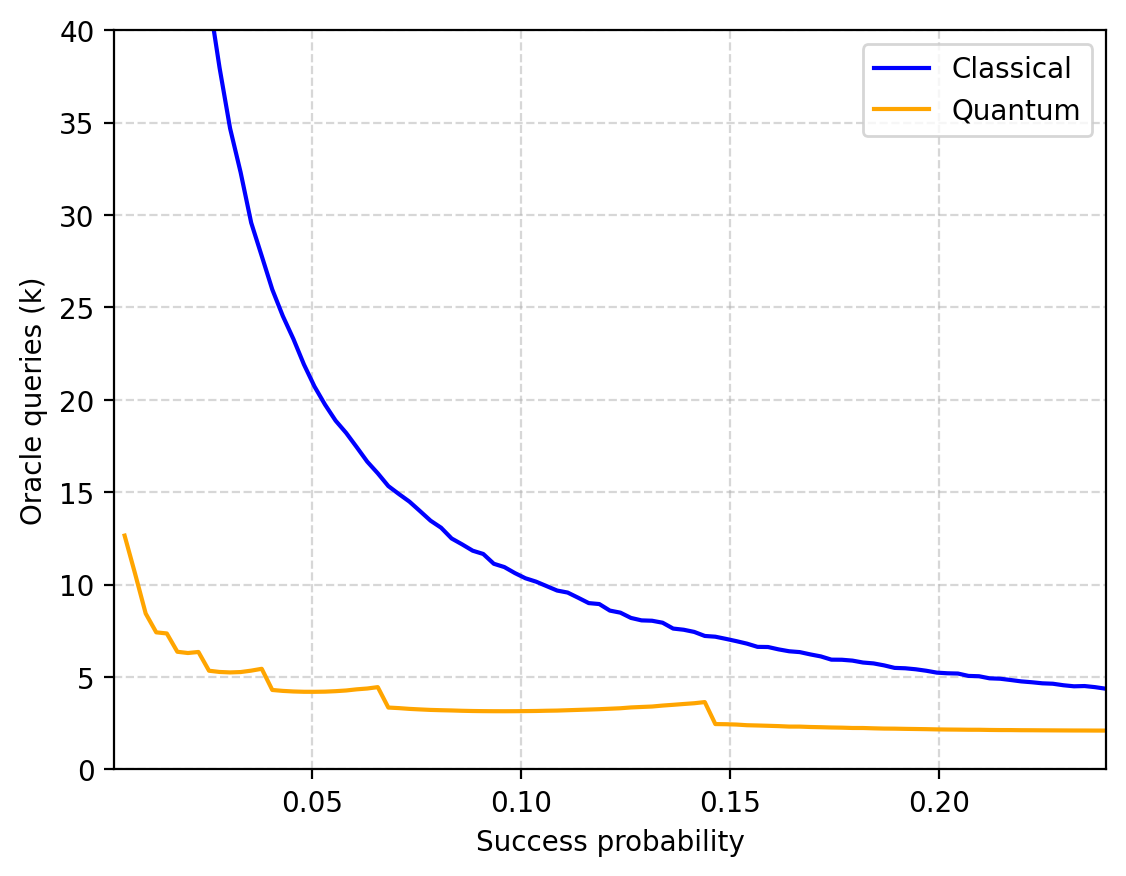

In [3]:
# Import necessary libraries
# Post-condition:
# - The script generates and displays a plot comparing the average number of oracle queries in classical vs. quantum approaches based on success probability.

import numpy as np
import bisect
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  # Set the output format of plots to 'retina' for better clarity

# Function to calculate the average number of trials in the classical approach
def get_try_classic(p, M = 1000):
    tam = int(2 * M / p)  # Calculate the size based on probability p
    res = np.random.binomial(1, p, size = tam)  # Perform binomial trials
    acumulative = np.cumsum(res)  # Calculate the cumulative sum of results
    return bisect.bisect_left(acumulative, M) + 1  # Find the position where M trials are reached

# Function to calculate the average number of trials in the quantum approach
def get_try_quantum(p, M = 1000):
    phi = np.arcsin(2*np.sqrt(p)*np.sqrt(1-p))  # Calculate the angle phi based on probability p
    R = int(np.round(np.arccos(np.sqrt(p)) / phi))  # Determine the number of rotations R
    new_p = (np.sin((2*R + 1)*phi/2))**2  # Calculate the new probability

    tam = int(2 * M / new_p)  # Calculate the size based on the new probability
    res = np.random.binomial(1, new_p, size = tam)  # Perform binomial trials
    acumulative = np.cumsum(res)  # Calculate the cumulative sum of results
    return (R+1) * (bisect.bisect_left(acumulative, M) + 1)  # Multiply by (R+1) and find the position where M trials are reached

# Vectorize the classic and quantum functions for batch processing
vectorized_try_classic = np.vectorize(get_try_classic)
vectorized_try_quantum = np.vectorize(get_try_quantum)

# Define parameters for the experiment
nCount = 20  # Number of trials
xx = np.linspace(0, 0.25, 100)[1:]  # Range of success probabilities

# Compute average results for the classical approach
yy_classic = vectorized_try_classic(xx)
for i in range(nCount):
    yy_classic += vectorized_try_classic(xx)
yy_classic = yy_classic / nCount  # Get the mean

# Compute average results for the quantum approach
yy_quantum = vectorized_try_quantum(xx)
for i in range(nCount):
    yy_quantum += vectorized_try_quantum(xx)
yy_quantum = yy_quantum / nCount  # Get the mean

# Define the start indices for the plot
start_classiq = 5
start_quantum = 1

# Create the plot
plt.plot(xx[start_classiq:], yy_classic[start_classiq:]/1000, color = "blue")
plt.plot(xx[start_quantum:], yy_quantum[start_quantum:]/1000, color = "orange")
plt.xlim(xx[0], 0.24)
plt.ylim(0, 40)

# Add legends
plt.xlabel('Success probability')
plt.ylabel('Oracle queries (k)')
plt.legend(['Classical', 'Quantum'])
plt.grid(True, which='both', linestyle='--', alpha=0.5)  # Add dashed grid lines with transparency
plt.show()  # Display the plot



Cite this work: